In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#import dataset
df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/2014-15_To_2016-17_School-_Level_NYC_Regents_Report_For_All_Variables.csv')

In [ ]:
#iterating the columns to get column names

for col in df.columns:
  print(col)

School DBN
School Name
School Level
Regents Exam
Year
Total Tested
Mean Score
Number Scoring Below 65
Percent Scoring Below 65
Number Scoring 65 or Above
Percent Scoring 65 or Above
Number Scoring 80 or Above
Percent Scoring 80 or Above
Number Scoring CR
Percent Scoring CR


In [ ]:
#not unique, they're all 'K-8'

df['School Level'].is_unique

False

In [ ]:
#remove multiple columns

drop_cols = ['School DBN', 'School Level', 'Regents Exam', 'Year', 'Total Tested', 'Mean Score', 'Number Scoring Below 65','Percent Scoring Below 65', 'Number Scoring 65 or Above', 'Percent Scoring 65 or Above', 'Number Scoring 80 or Above','Number Scoring CR','Percent Scoring CR']
df.drop(drop_cols, inplace = True, axis=1)

In [ ]:
#fiilter out 's'
df[df['Percent Scoring 80 or Above']!='s']
#hmmm

,School Name,Percent Scoring 80 or Above
1,P.S. 034 Franklin D. Roosevelt,43.8
2,P.S. 034 Franklin D. Roosevelt,22.2
5,P.S. 140 Nathan Straus,0
6,P.S. 140 Nathan Straus,33.3
7,P.S. 140 Nathan Straus,11.1
...,...,...
212321,Icahn Charter School,100
212322,Icahn Charter School,100
212323,Icahn Charter School,83.3
212324,Icahn Charter School,25


In [ ]:
df.head(18762)

,School Name,Percent Scoring 80 or Above
0,P.S. 034 Franklin D. Roosevelt,s
1,P.S. 034 Franklin D. Roosevelt,43.8
2,P.S. 034 Franklin D. Roosevelt,22.2
3,P.S. 140 Nathan Straus,s
4,P.S. 140 Nathan Straus,s
...,...,...
18757,John V. Lindsay Wildcat Academy Charter School,7.3
18758,John V. Lindsay Wildcat Academy Charter School,1.3
18759,John V. Lindsay Wildcat Academy Charter School,10.1
18760,John V. Lindsay Wildcat Academy Charter School,8.3


In [ ]:
#filter out rows with 's' in 'Percent Scoring 80 or Above' column
df2 = df[df['Percent Scoring 80 or Above']!='s']
df2.isnull()

,School Name,Percent Scoring 80 or Above
1,False,False
2,False,False
5,False,False
6,False,False
7,False,False
...,...,...
212321,False,False
212322,False,False
212323,False,False
212324,False,False


In [ ]:
#total # of missing values
df2.isnull().sum()

School Name                    0
Percent Scoring 80 or Above    0
dtype: int64

In [ ]:
df2.head(202670)
#success

,School Name,Percent Scoring 80 or Above
1,P.S. 034 Franklin D. Roosevelt,43.8
2,P.S. 034 Franklin D. Roosevelt,22.2
5,P.S. 140 Nathan Straus,0
6,P.S. 140 Nathan Straus,33.3
7,P.S. 140 Nathan Straus,11.1
...,...,...
212321,Icahn Charter School,100
212322,Icahn Charter School,100
212323,Icahn Charter School,83.3
212324,Icahn Charter School,25


In [ ]:
#change datatype to float

df3 = df2.astype({'Percent Scoring 80 or Above':'float'})
df3['Percent Scoring 80 or Above'].dtype

dtype('float64')

In [ ]:
#filter out 0 from 'Percent Scoring 80 or Above' column
df3[df3['Percent Scoring 80 or Above']>0]

,School Name,Percent Scoring 80 or Above
1,P.S. 034 Franklin D. Roosevelt,43.8
2,P.S. 034 Franklin D. Roosevelt,22.2
6,P.S. 140 Nathan Straus,33.3
7,P.S. 140 Nathan Straus,11.1
8,P.S. 184m Shuang Wen,46.9
...,...,...
212321,Icahn Charter School,100.0
212322,Icahn Charter School,100.0
212323,Icahn Charter School,83.3
212324,Icahn Charter School,25.0


In [ ]:
#assign filtered dataset to new df4
df4 = df3[df3['Percent Scoring 80 or Above']>0]

In [ ]:
#now i want to compare LIC HS percentages to rest of the schools

In [ ]:
#first, some stats of the whole dataset after filtering out missing data 's' and 0%
df4.describe()

,Percent Scoring 80 or Above
count,107113.000000
mean,29.046718
std,26.295884
min,0.200000
25%,8.300000
50%,19.700000
75%,42.900000
max,100.000000


In [ ]:
#select rows containing 'LIC HS'

df4.loc[df4['School Name']=='Long Island City High School']

,School Name,Percent Scoring 80 or Above
16553,Long Island City High School,3.8
16554,Long Island City High School,5.3
16556,Long Island City High School,0.3
16557,Long Island City High School,5.2
16558,Long Island City High School,7.8
...,...,...
202665,Long Island City High School,21.4
202666,Long Island City High School,29.8
202667,Long Island City High School,18.6
202668,Long Island City High School,14.8


In [ ]:
#assign to new df5

df5=df4.loc[df4['School Name']=='Long Island City High School']

In [ ]:
#number of rows/count
df5.count()

School Name                    356
Percent Scoring 80 or Above    356
dtype: int64

In [ ]:
#stats of only LIC HS after filters
df5.describe()

,Percent Scoring 80 or Above
count,356.000000
mean,12.988483
std,12.519742
min,0.300000
25%,3.475000
50%,9.200000
75%,17.975000
max,85.700000


In [ ]:
#select rows NOT 'LIC HS'
df6 = df4.loc[df4['School Name']!='Long Island City High School']
df6

,School Name,Percent Scoring 80 or Above
1,P.S. 034 Franklin D. Roosevelt,43.8
2,P.S. 034 Franklin D. Roosevelt,22.2
6,P.S. 140 Nathan Straus,33.3
7,P.S. 140 Nathan Straus,11.1
8,P.S. 184m Shuang Wen,46.9
...,...,...
212321,Icahn Charter School,100.0
212322,Icahn Charter School,100.0
212323,Icahn Charter School,83.3
212324,Icahn Charter School,25.0


In [ ]:
#stats of other schools NOT lic hs
df6.describe()

,Percent Scoring 80 or Above
count,106757.000000
mean,29.100267
std,26.313406
min,0.200000
25%,8.300000
50%,19.900000
75%,42.900000
max,100.000000


In [ ]:
#count how many times 'Percent Scoring 80 or Above' shows up in unique school names in other schools NOT lic hs
df6.groupby(['School Name'])['Percent Scoring 80 or Above'].count().sort_values(ascending=False)

School Name
New Visions Charter High School for Advanced Math     720
Francis Lewis High School                             442
New Visions Charter High School for the Humanities    438
Edward R. Murrow High School                          437
Fort Hamilton High School                             436
                                                     ... 
P.S. 161 Pedro Albizu Campos                            2
International Arts Business School                      1
P.S. 096 Joseph Lanzetta                                1
Legacy School for Integrated Studies                    1
M.S. 250 West Side Collaborative Middle School          1
Name: Percent Scoring 80 or Above, Length: 941, dtype: int64

In [ ]:
#count how many times 'Percent Scoring 80 or Above' shows up in lic hs
df5.groupby(['School Name'])['Percent Scoring 80 or Above'].count().sort_values(ascending=False)

School Name
Long Island City High School    356
Name: Percent Scoring 80 or Above, dtype: int64

In [ ]:
#mean of all other schools not lic hs for 'Percent Scoring 80 or Above'
df6.groupby(['School Name'])['Percent Scoring 80 or Above'].mean().sort_values(ascending=False)

School Name
P.S. 161 Pedro Albizu Campos             100.000000
Brooklyn Dreams Charter School           100.000000
Washington Heights Academy               100.000000
The 30th Avenue School (G&T Citywide)     98.087500
J.H.S. 185 Edward Bleeker                 98.021739
                                            ...    
Kennedy Yabc                               4.741379
Urban Dove Charter School                  4.741096
South Bronx Community Charter School       4.733333
I.S. 528 Bea Fuller Rodgers School         4.633333
P.S. 3 Raul Julia Micro Society            3.366667
Name: Percent Scoring 80 or Above, Length: 941, dtype: float64

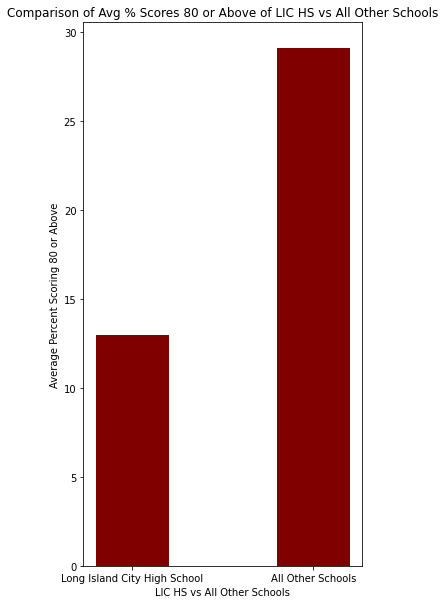

In [ ]:
#plot bar graph of means of all  other schools NOT lic hs vs mean of lic hs
data = {'Long Island City High School':12.988483, 'All Other Schools':29.100267}

schools = list(data.keys())
means = list(data.values())

fig = plt.figure(figsize = (5, 10))
plt.bar(schools, means, color ='maroon', width = 0.4)

plt.xlabel("LIC HS vs All Other Schools")
plt.ylabel("Average Percent Scoring 80 or Above")
plt.title("Comparison of Avg % Scores 80 or Above of LIC HS vs All Other Schools")
plt.show()